In [ ]:
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [ ]:
def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [ ]:
import re
data = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'whatsapp-chat-data.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDateAndTime(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [ ]:
df = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

<ipython-input-45-8dbae0e31db6>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])


,Date,Time,Author,Message
13633,2020-02-10,1:27 am,+91 73032 50500,<Media omitted>
13634,2020-02-10,1:46 am,"Darshan Rander (TSEC, IT)",Lucky u
13635,2020-02-10,1:47 am,+91 73032 50500,Darshan brooo
13636,2020-02-10,1:47 am,+91 73032 50500,Yeh kar na dost
13637,2020-02-10,1:47 am,+91 73032 50500,..
13638,2020-02-10,1:47 am,+91 73032 50500,..
13639,2020-02-10,1:47 am,+91 73032 50500,Mil jayegaa
13640,2020-02-10,1:47 am,"Darshan Rander (TSEC, IT)",Okk mene pehle kiya tha firse?
13641,2020-02-10,1:49 am,"Shubham Chettiar (TSEC CS, TE)","Yeah, many people tried this in the morning an..."
13642,2020-02-10,1:49 am,"Darshan Rander (TSEC, IT)",Okk firse karte hai...hope so mil jaye


In [ ]:
df.Author.unique()

array([None, '+91 96536 93868', 'Dheeraj Lalwani (TSEC, CS)',
       '+91 99201 75875', '+91 95949 08570', '+91 79778 76844',
       '+91 90499 38860', 'Tanay Kamath (TSEC, CS)', 'Saket (TSEC, CS)',
       '+91 77568 95072', 'Rohit Pathak (TSEC, CS)', '+91 75078 05454',
       'Darshan Rander (TSEC, IT)', '+91 79774 68083', '+91 70394 60876',
       '+91 96191 55044', '+91 90678 93300', 'Mohit Varma (TSEC, CS)',
       '+91 79770 56210', 'Chirag Sharma (TSEC, CS)',
       'Vivek Iyer (TSEC, Biomed)', 'Tushar Nankani', '+91 81696 22410',
       '+91 89764 07509', '+91 78758 66747', 'Ankit (TSEC, CS)',
       '+91 86556 33169', '+91 76663 28147', '+91 88284 70904',
       '+91 97698 67348', 'Vivek (TSEC, CS)', 'Hardik Raheja (TSEC, CS)',
       '+91 91680 38866', 'Mittul Dasani (TSEC, CS)',
       'Kartik Soneji (TSEC, CS)', '+91 77180 43697', '+91 99676 84479',
       'Shreya (TSEC, IT)', '+91 96190 16721', '+91 89833 85127',
       '+91 99675 58551', '+91 90822 59476', 'Prithvi Rohira 

In [ ]:
### Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)
### Rearranging the columns for better understanding
df = df[['Date','Day','Time','Author','Message']]
### Changing the datatype of column "Day".
df['Day'] = df['Day'].astype('category')
### Looking newborn dataset.
df.head()
### Counting number of letters in each message
df['Letters'] = df['Message'].apply(lambda s : len(s))
### Counting number of word's in each message
df['Words'] = df['Message'].apply(lambda s : len(s.split(' ')))
### Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://S+)'
df['Url_Count'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)
### Function to count number of media in chat.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
### Looking updated dataset
df

,Date,Day,Time,Author,Message,Letters,Words,Url_Count,Media_Count
0,2020-01-24,Friday,8:25 pm,None,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",54,7,0,0
1,2020-01-26,Sunday,4:19 pm,None,You joined using this group's invite link,41,7,0,0
2,2020-01-26,Sunday,4:20 pm,None,+91 99871 38558 joined using this group's invi...,53,9,0,0
3,2020-01-26,Sunday,4:20 pm,None,+91 91680 38866 joined using this group's invi...,53,9,0,0
4,2020-01-26,Sunday,4:22 pm,None,+91 72762 35231 joined using this group's invi...,53,9,0,0
...,...,...,...,...,...,...,...,...,...
13648,2020-02-10,Monday,2:05 am,"Darshan Rander (TSEC, IT)",7mins ig,8,2,0,0
13649,2020-02-10,Monday,2:05 am,"Darshan Rander (TSEC, IT)",MCQs mark kiya,14,3,0,0
13650,2020-02-10,Monday,2:05 am,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,14,2,0,0
13651,2020-02-10,Monday,2:11 am,"Tanay Kamath (TSEC, CS)",Incognito se na?,16,3,0,0


In [ ]:
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
links = np.sum(df.Url_Count)
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print('Total Number of Links : {}'.format(links))

Group Chatting Stats : 
Total Number of Messages : 13653
Total Number of Media Messages : 687
Total Number of Links : 0


In [ ]:
l = df.Author.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')
  ### shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])
  ### Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Words']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))
  print('Average Words per Message : ', w_p_m)
  ### media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)
  ### links consist of total links
  links = sum(req_df["Url_Count"])
  print('Total Links Sent : ', links)
  print()
  print('----------------------------------------------------------n')

--> Stats of None <-- 
Total Message Sent :  0
Average Words per Message :  nan
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of +91 96536 93868 <-- 
Total Message Sent :  70
Average Words per Message :  14.900
Total Media Message Sent :  5
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Dheeraj Lalwani (TSEC, CS) <-- 
Total Message Sent :  1853
Average Words per Message :  6.300
Total Media Message Sent :  116
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of +91 99201 75875 <-- 
Total Message Sent :  34
Average Words per Message :  10.650
Total Media Message Sent :  4
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of +91 95949 08570 <-- 
Total Message Sent :  100
Average Words per Message :  3.860
Total Media Message Sent :  5
Total Links Sent :  0

---------------------

<ipython-input-52-3e2fcd7e0880>:10: RuntimeWarning: invalid value encountered in long_scalars
  words_per_message = (np.sum(req_df['Words']))/req_df.shape[0]


Total Links Sent :  0

----------------------------------------------------------n
--> Stats of +91 97698 67348 <-- 
Total Message Sent :  1
Average Words per Message :  2.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Vivek (TSEC, CS) <-- 
Total Message Sent :  24
Average Words per Message :  7.420
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Hardik Raheja (TSEC, CS) <-- 
Total Message Sent :  10
Average Words per Message :  8.600
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of +91 91680 38866 <-- 
Total Message Sent :  1
Average Words per Message :  4.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Mittul Dasani (TSEC, CS) <-- 
Total Message Sent :  29
Average Words

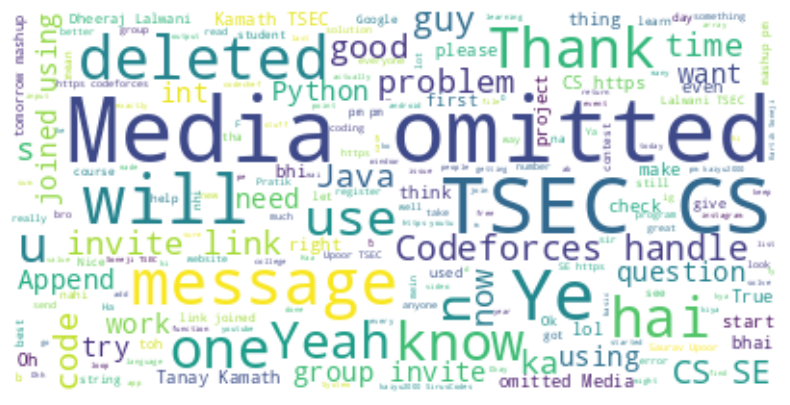

In [ ]:
### Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  ### Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
### Creates a list of unique Authors
l = df.Author.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

None   ->   0
+91 96536 93868   ->   70
Dheeraj Lalwani (TSEC, CS)   ->   1853
+91 99201 75875   ->   34
+91 95949 08570   ->   100
+91 79778 76844   ->   2
+91 90499 38860   ->   3
Tanay Kamath (TSEC, CS)   ->   2408
Saket (TSEC, CS)   ->   146
+91 77568 95072   ->   1
Rohit Pathak (TSEC, CS)   ->   23
+91 75078 05454   ->   101
Darshan Rander (TSEC, IT)   ->   1358
+91 79774 68083   ->   8
+91 70394 60876   ->   33
+91 96191 55044   ->   15
+91 90678 93300   ->   1
Mohit Varma (TSEC, CS)   ->   46
+91 79770 56210   ->   73
Chirag Sharma (TSEC, CS)   ->   50
Vivek Iyer (TSEC, Biomed)   ->   57
Tushar Nankani   ->   308
+91 81696 22410   ->   12
+91 89764 07509   ->   114
+91 78758 66747   ->   9
Ankit (TSEC, CS)   ->   42
+91 86556 33169   ->   3
+91 76663 28147   ->   1
+91 88284 70904   ->   201
+91 97698 67348   ->   1
Vivek (TSEC, CS)   ->   24
Hardik Raheja (TSEC, CS)   ->   10
+91 91680 38866   ->   1
Mittul Dasani (TSEC, CS)   ->   29
Kartik Soneji (TSEC, CS)   ->   777
+91 771

In [ ]:
l = df.Day.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Day"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Friday   ->   1816
Sunday   ->   2584
Monday   ->   1985
Tuesday   ->   1432
Wednesday   ->   2350
Thrusday   ->   2155
Saturday   ->   1331


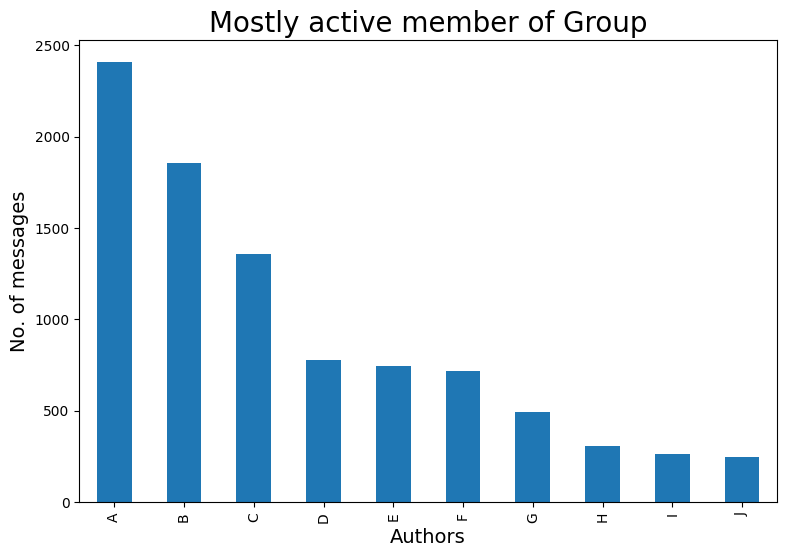

In [ ]:
### Mostly Active Author in the Group
plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts()
### Top 10 peoples that are mostly active in our Group is :
m_a = mostly_active.head(10)
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

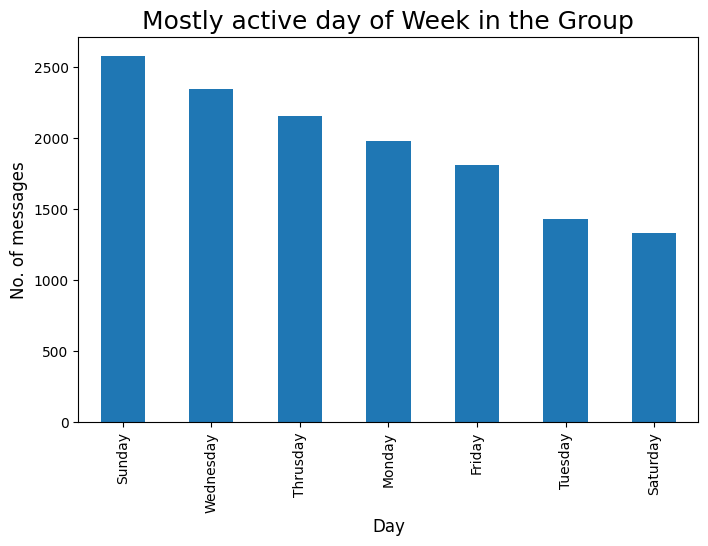

In [ ]:
### Mostly Active day in the Group
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts()
### Top 10 peoples that are mostly active in our Group is :
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of Week in the Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

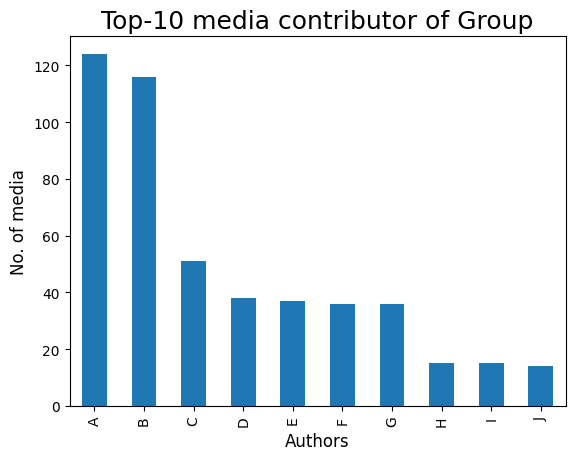

In [ ]:
### Top-10 Media Contributor of Group
mm = df[df['Message'] == '<Media omitted>']
mm1 = mm['Author'].value_counts()
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
top10 = mm1.head(10)
top10.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of media',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Top-10 media contributor of Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

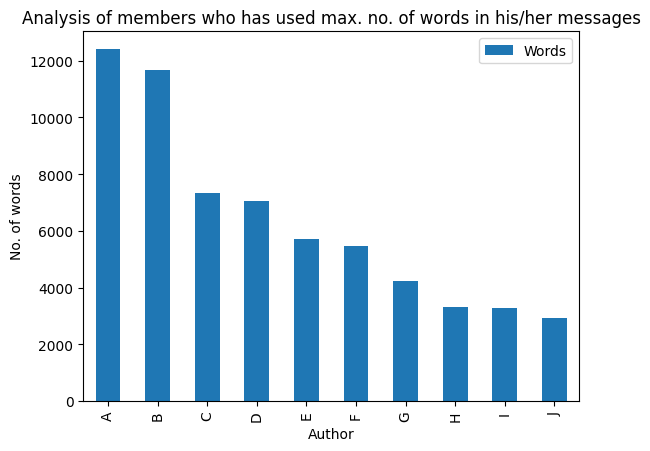

In [ ]:
max_words = df[['Author','Words']].groupby('Author').sum()
m_w = max_words.sort_values('Words',ascending=False).head(10)
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
m_w.plot.bar(rot=90)
plt.xlabel('Author')
plt.ylabel('No. of words')
plt.title('Analysis of members who has used max. no. of words in his/her messages')
plt.xticks(x_pos, bars)
plt.show()

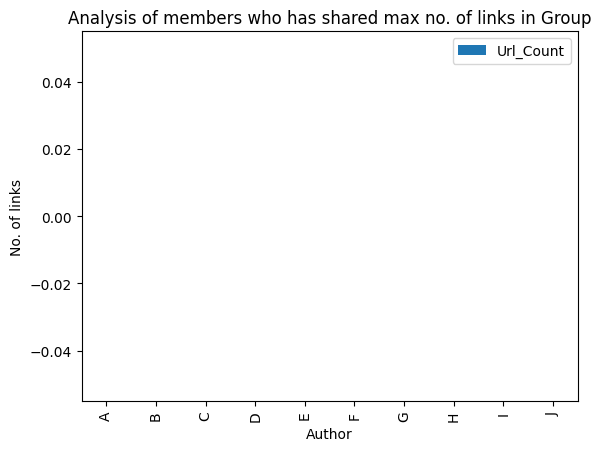

In [ ]:
### Member who has shared max numbers of link in Group
max_words = df[['Author','Url_Count']].groupby('Author').sum()
m_w = max_words.sort_values('Url_Count',ascending=False).head(10)
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
m_w.plot.bar(rot=90)
plt.xlabel('Author')
plt.ylabel('No. of links')
plt.title('Analysis of members who has shared max no. of links in Group')
plt.xticks(x_pos, bars)
plt.show()

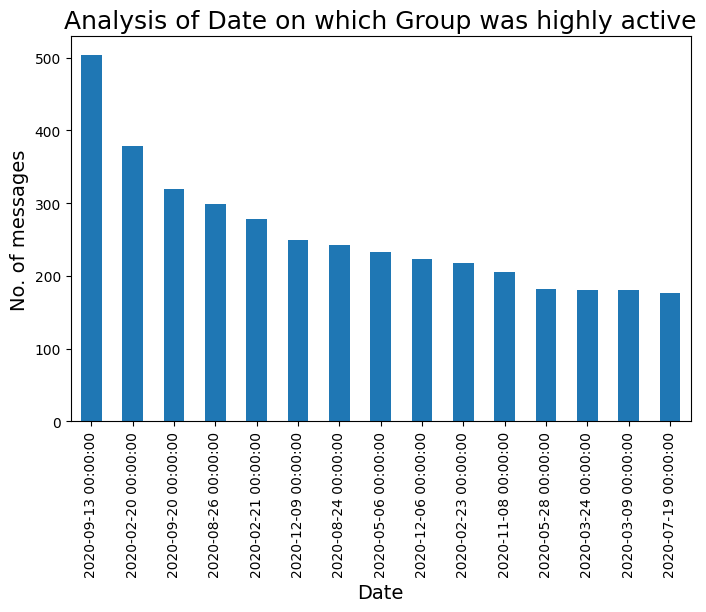

In [ ]:
### Date on which our Group was highly active.
plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which Group was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [ ]:
z = df['Date'].value_counts()
z1 = z.to_dict() #converts to dictionary
df['Msg_count'] = df['Date'].map(z1)
### Timeseries plot
fig = px.line(x=df['Date'],y=df['Msg_count'])
fig.update_layout(title='Analysis of number of messages using TimeSeries plot.',
                  xaxis_title='Month',
                  yaxis_title='No. of Messages')
fig.update_xaxes(nticks=20)
fig.show()

In [ ]:
df['Year'] = df['Date'].dt.year
df['Mon'] = df['Date'].dt.month
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
df['Month'] = df['Mon'].map(months)
df.drop('Mon',axis=1,inplace=True)

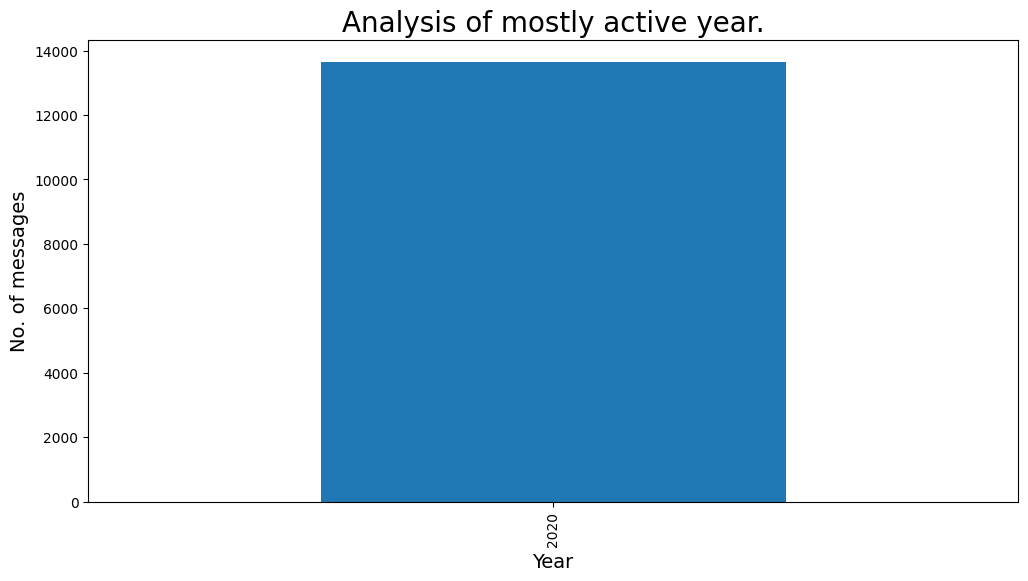

In [ ]:
### Total message per year
### As we analyse that the group was created in mid 2019, thats why number of messages in 2019 is less.
plt.figure(figsize=(12,6))
active_month = df['Year'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Year',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active year.',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

In [ ]:

pip install emoji==1.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Darshan Rander (TSEC, IT)", "Tanay Kamath (TSEC, CS)", "Shubham Chettiar (TSEC CS, TE)"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])
  print('Links Sent', links)
  print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12966 entries, 0 to 13652
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         12966 non-null  datetime64[ns]
 1   Day          12966 non-null  category      
 2   Time         12966 non-null  object        
 3   Author       11889 non-null  object        
 4   Message      12966 non-null  object        
 5   Letters      12966 non-null  int64         
 6   Words        12966 non-null  int64         
 7   Url_Count    12966 non-null  int64         
 8   Media_Count  12966 non-null  int64         
 9   emoji        12966 non-null  object        
 10  urlcount     12966 non-null  int64         
 11  Msg_count    12966 non-null  int64         
 12  Year         12966 non-null  int64         
 13  Month        12966 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(7), object(5)
memory usage: 1.4+ MB
Stats of Darshan Rander (

In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('😂', 1896)
('👍', 259)
('🔥', 254)
('😅', 224)
('💯', 185)
('🤣', 132)
('👍🏻', 99)
('🤦\u200d♂️', 83)
('👏', 74)
('🙏', 62)
('🙌🏻', 52)
('😭', 48)
('🤔', 37)
('🤩', 32)
('👌', 29)
('❤️', 29)
('🙄', 28)
('👏🏻', 26)
('🤦\u200d♂', 25)
('✨', 23)
('🙈', 22)
('👌🏻', 22)
('🙌', 21)
('😢', 21)
('🤦🏻\u200d♂️', 21)
('🤯', 18)
('😍', 18)
('😁', 16)
('👌🏼', 16)
('🥳', 15)
('🙏🏻', 14)
('🤷🏻\u200d♂️', 14)
('💻', 13)
('🙁', 12)
('😎', 12)
('✅', 11)
('🥺', 11)
('✌️', 11)
('😓', 11)
('⚒', 11)
('🎉', 10)
('🙃', 10)
('💪🏻', 10)
('🤷\u200d♂️', 10)
('👉🏾', 10)
('👨\u200d💻', 9)
('🔸', 9)
('⚡️', 9)
('⚡', 9)
('😊', 8)
('👨🏻\u200d💻', 8)
('😶', 8)
('💪', 8)
('🤞', 8)
('👉🏻', 8)
('😤', 8)
('👩🏻\u200d💻', 7)
('🏁', 7)
('➡', 7)
('👍🏼', 7)
('✌', 6)
('☝', 6)
('📍', 6)
('🙂', 6)
('❤', 6)
('🎂', 6)
('😡', 6)
('🟢', 6)
('🙌🏼', 6)
('▪️', 6)
('‼️', 6)
('👉', 6)
('🤨', 5)
('🏆', 5)
('📌', 5)
('⏳', 5)
('😋', 5)
('🗓', 5)
('🔊', 5)
('🔴', 5)
('👀', 5)
('😉', 5)
('😱', 5)
('💛', 5)
('🌟', 5)
('😳', 5)
('🛑', 5)
('🤟', 4)
('😄', 4)
('😇', 4)
('👇🏻', 4)
('🔶', 4)
('😌', 4)
('😃', 4)
('🥴', 4)
('🤞🏻', 4)
('

There are 647511 words in all the messages.


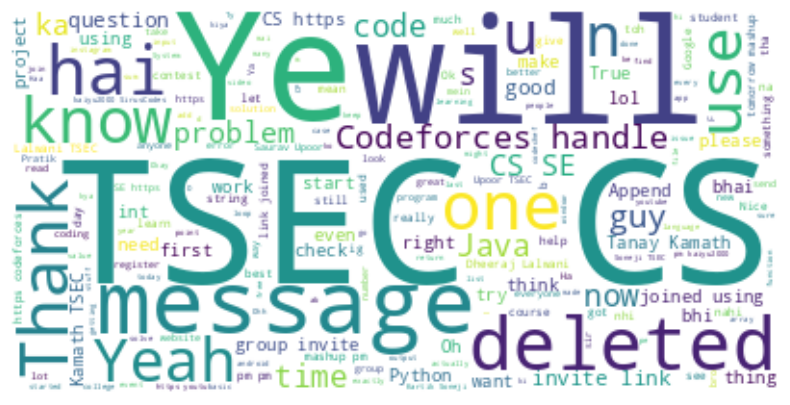

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Darshan Rander (TSEC, IT)


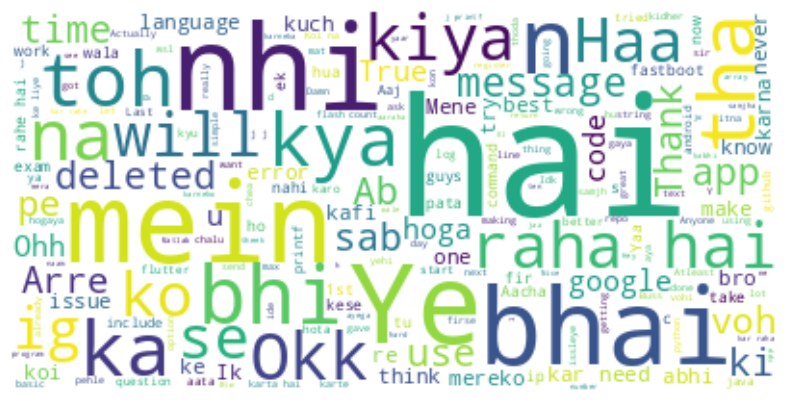

Author name Tanay Kamath (TSEC, CS)


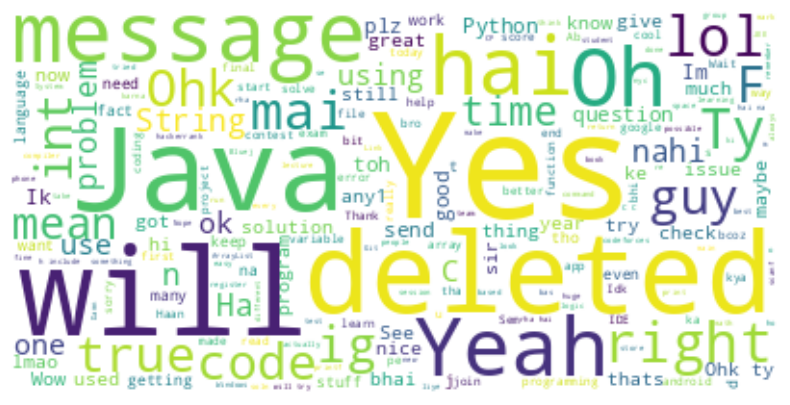

Author name Shubham Chettiar (TSEC CS, TE)


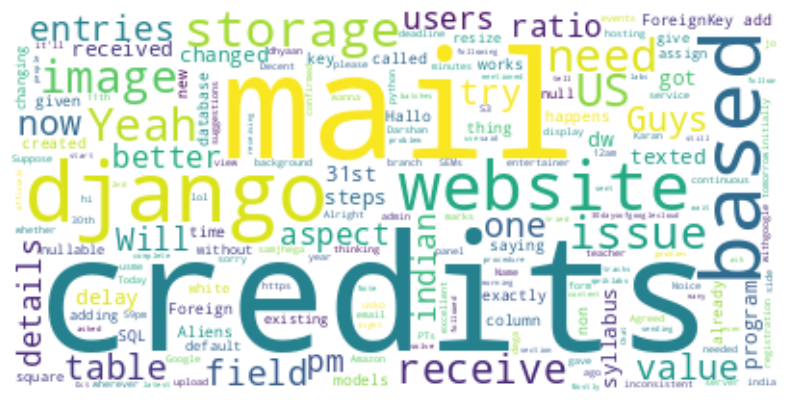

In [ ]:
l = ["Darshan Rander (TSEC, IT)", "Tanay Kamath (TSEC, CS)", "Shubham Chettiar (TSEC CS, TE)"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()